In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import itertools
from sklearn import metrics
from sklearn.metrics import pairwise_distancessss

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering


In [0]:
data_path = ("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv")
df = pd.read_csv(data_path)
bm2014 = df

In [0]:
bm2014

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,116.37,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,70.23,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,107.47,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,67.83,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [0]:
bm2014.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [0]:
bm2014.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [0]:
# Drop 'ctz' since there are only 757 and it's probably all Nan
# drop name, country, bib, city, state since these are strings
bm2014 = bm2014.drop(['ctz', 'name', 'country', 'bib',
                                 'city', 'state', 'genderdiv'], axis=1)

In [0]:
bm2014

,10k,division,25k,gender,age,official,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,M,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,F,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,M,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,F,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,M,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72
5,32.58,4,82.45,F,29,140.68,116.37,28,5.37,99.33,16.22,69.47,65.83,132.95
6,17.65,4,47.67,M,28,84.65,70.23,4,3.23,58.60,8.38,39.72,37.65,79.83
7,30.48,5,76.95,M,29,129.83,107.47,5,4.97,92.52,15.17,64.85,61.62,122.80
8,17.12,3,46.37,M,43,81.23,67.83,3,3.10,57.03,8.00,38.60,36.60,76.70
9,30.48,20,77.68,M,31,137.83,112.27,20,5.27,94.78,15.15,65.23,61.78,129.83


In [0]:
# Convert gender to binary classifier
bm2014['gender'] = bm2014.gender.map(lambda x: 0 if x is 'F' else 1)

# Convert the marathon numbers to floats.
cols = ['25k', 'half', '30k','10k', '20k', '35k', '40k', '5k']

bm2014[cols] = bm2014[cols].apply(pd.to_numeric, errors='coerce', axis=1)

bm2014 = bm2014.dropna()

# K-means 


In [0]:
# Make sure the number of rows divides evenly into four samples.
rows = bm2014.shape[0] - bm2014.shape[0] % 4
bm2014 = bm2014.iloc[:rows, :]

X = bm2014
# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 8):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [0]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 9):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

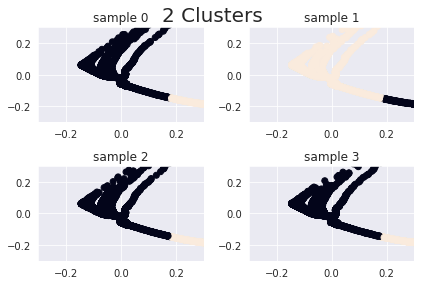

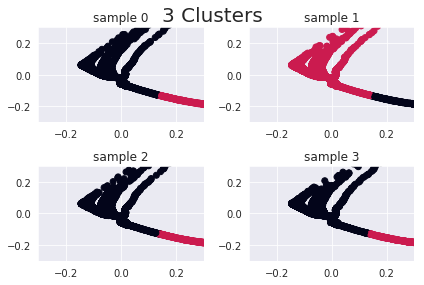

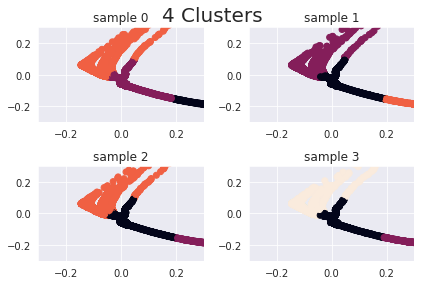

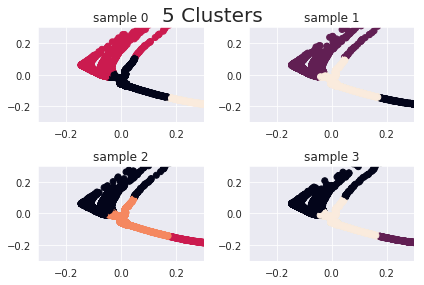

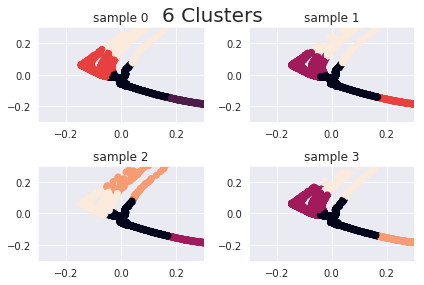

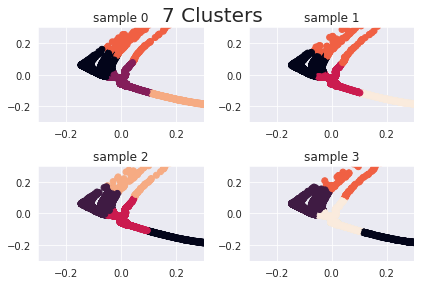

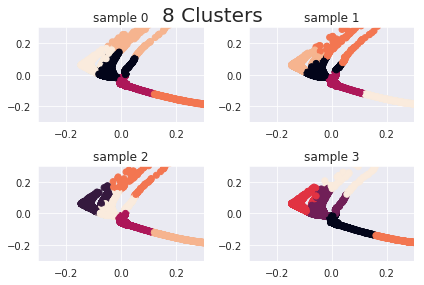

In [0]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 9):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')


In [0]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=6, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.613960225957837
0.6235190171876508
0.6150839965398418
0.6165221510256378


In [56]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=3, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.7592378937710167
0.7636669901564623
0.7642572192112425
0.7610768234892612


In [57]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=4, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.5897201501165545
0.5984612772053606
0.592621078555269
0.5923821248551533


In [58]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=7, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.6093739970950511
0.6175787028739217
0.611526198165216
0.6085430268019592


In [60]:
for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=8, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.5275872338546017
0.521135522956584
0.5189317127778466
0.5152697216858211


Mean hit model 


In [0]:
# Initialize new data frames
ypred_ms = pd.DataFrame()
score_ms = pd.DataFrame(columns=['cluster_pred','mean_shift', 'quantile'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Creating a list of possible quantiles to test in mean shift.
    for n in [0.1, 0.2, 0.3, 0.4]:
        # Estimating number of clusters for data
        bandwidth = estimate_bandwidth(data, quantile=n, n_samples=500)
        # Ensuring all sets are the same lenght
        data = data[:4013][:]
        # Instantiating and fit_predicting model to then add to data frame
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        pred = ms.fit_predict(data)
        labels = ms.labels_
        cntrs = len(np.unique(labels))
        ypred_ms['clust' + str(cntrs) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        sscore = metrics.silhouette_score(data, labels, metric='euclidean')
        score_ms = score_ms.append({'cluster_pred':'clust' + str(cntrs) + '_sample' + str(counter), 
                              'silhouette_score':sscore, 'quantile':n}, ignore_index=True)


In [0]:
score_ms.sort_values(by='silhouette_score', ascending=False)


,cluster_pred,mean_shift,quantile,silhouette_score
15,clust3_sample3,NaN,0.4,0.760491
11,clust5_sample2,NaN,0.4,0.756503
14,clust6_sample3,NaN,0.3,0.745829
13,clust8_sample3,NaN,0.2,0.733279
6,clust9_sample1,NaN,0.3,0.728535
7,clust8_sample1,NaN,0.4,0.717695
10,clust8_sample2,NaN,0.3,0.634159
2,clust10_sample0,NaN,0.3,0.628053
3,clust7_sample0,NaN,0.4,0.618532
5,clust14_sample1,NaN,0.2,0.604820


In [0]:

# Initialize data frames
ypred_sc = pd.DataFrame()
score_sc = pd.DataFrame(columns=['cluster_pred','silhouette_score'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred_sc['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred_sc['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Creating a list of possible number of clusters to test in kmeans.
    for nclust in range(2, 6):
        # Instantiating and fit_predicting model to then add to data frame
        sc = SpectralClustering(n_clusters=nclust)
        pred = sc.fit_predict(data[0])
        ypred_sc['clust' + str(nclust) + '_sample' + str(counter)] = pred
        # Calculating silhouette scores for the data and adding that to the shilouette score
        labels = sc.labels_
        sscore_sc = metrics.silhouette_score(data[0], labels, metric='euclidean')
        score_sc = score_sc.append({'cluster_pred':'clust' + str(nclust) + '_sample' + str(counter), 
                              'silhouette_score':sscore_sc}, ignore_index=True)

In [46]:
score_sc.sort_values(by='silhouette_score', ascending=False)


,cluster_pred,silhouette_score
8,clust2_sample2,0.776572
4,clust2_sample1,0.775632
0,clust2_sample0,0.774892
12,clust2_sample3,0.772752
9,clust3_sample2,0.766780
13,clust3_sample3,0.764926
5,clust3_sample1,0.764867
1,clust3_sample0,0.761589
10,clust4_sample2,0.756007
14,clust4_sample3,0.752215


In [0]:
# Initialize data frames
ypred = pd.DataFrame()
score_af = pd.DataFrame(columns=['cluster_pred','AF'])

# Keep track of counts of the models and use data from the different folds
for counter, data in enumerate([X1, X2, X3, X4]):
    # Ensuring all sets are the same lenght
    data = data[:4013][:]
    # Instantiating and fit_predicting model to then add to data frame
    af = AffinityPropagation().fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    #pred = af.fit_predict(data)
    #ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred
    # Calculating silhouette scores for the data and adding that to the shilouette score
    labels = af.labels_
    sscore_af = metrics.silhouette_score(data, labels, metric='euclidean')
    score_af = score_af.append({'cluster_pred':'clust' + str(n_clusters_) + '_sample' + str(counter), 
                              'AF':sscore_af}, ignore_index=True)
    score_af.sort_values(by='AF', ascending=False)


In [0]:
    score_af.sort_values(by='AF', ascending=False)


,cluster_pred,AF
0,clust1824_sample0,0.208512
3,clust1632_sample3,0.205413
2,clust2462_sample2,0.128485
1,clust2927_sample1,0.093249


In [45]:
print('Estimated number of clusters: {}'.format(n_clusters_))


Estimated number of clusters: 1632


# Cluster viz 

In [47]:

cluster_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(3):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print('\n')
    print(frame.describe())

0


                10k      division  ...           40k  cluster_assignment
count  10429.000000  10429.000000  ...  10429.000000             10429.0
mean      61.049732   3057.510308  ...    284.575697                 0.0
std        6.499528   2060.846602  ...     33.788093                 0.0
min       38.470000      1.000000  ...    184.650000                 0.0
25%       56.500000   1433.000000  ...    257.230000                 0.0
50%       60.400000   2292.000000  ...    276.620000                 0.0
75%       64.900000   5100.000000  ...    305.050000                 0.0
max      112.380000   6979.000000  ...    508.350000                 0.0

[8 rows x 15 columns]
1


                10k      division  ...           40k  cluster_assignment
count  10607.000000  10607.000000  ...  10607.000000             10607.0
mean      50.721254   1714.833506  ...    219.652102                 1.0
std        3.459838   1266.185395  ...     11.255606                 0.0
min       36.870000 

In [0]:

# run k-means on the full dataset
n_clusters = 3
km_model = KMeans(n_clusters = n_clusters, random_state = 42)
km_model.fit(X_pred)
# add labels to data for analysis
X_label = X_pred.copy()
X_label['label'] = km_model.labels_

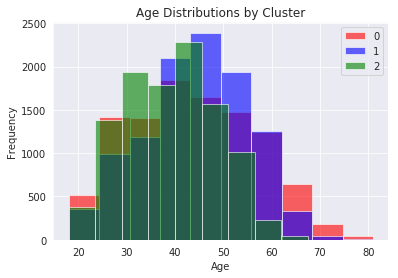

In [49]:
# look at age histograms by cluster
fig,ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green'}
grouped = X_label.groupby('label')
for key,group in grouped:
    group['age'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.6)
plt.legend()
plt.xlabel('Age')
plt.title('Age Distributions by Cluster')
plt.show()

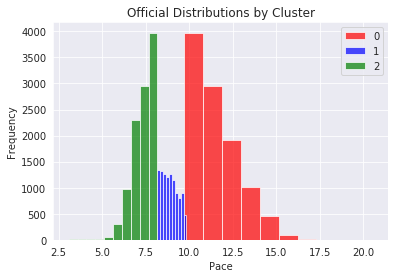

In [50]:
# look at pace histograms by cluster
fig,ax = plt.subplots()
for key,group in grouped:
    group['pace'].plot(ax=ax, kind='hist', label=key, color=colors[key], alpha = 0.7)
plt.legend()
plt.xlabel('Pace')
plt.title('Official Distributions by Cluster')
plt.show()

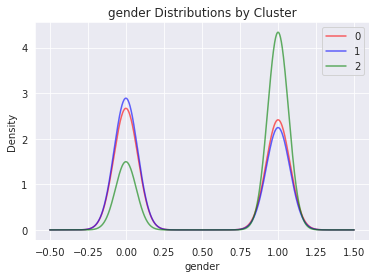

In [61]:
# look at age histograms by cluster
fig,ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green'}
grouped = X_label.groupby('label')
for key,group in grouped:
    group['gender'].plot(ax=ax, kind='kde', label=key, color=colors[key], alpha = 0.6)
plt.legend()
plt.xlabel('gender')
plt.title('gender Distributions by Cluster')
plt.show()



Among the three clusters, the second cluster is the most distinct. The finishing times and pacing for the secsond cluster are significantly higher than the other clusters. This may be due to the fact that the second cluster has a higher representation of males. Furthermore, the secsond clustser has a higher distribution of younger runners when compared to the other clusters. 